# Análisis del dataset Titanic con Python (UT2_PD4)



1.   [Importar librerías y paquetes](#importa)
2.   [Carga y visualización de datasets](#carga)
3.   [Tratamiento de datos faltantes](#tratamiento)
4.   [Visualización de los datos](#visual)
5.   [Feature Engineering](#feature)
6.   [Normalización](#norma)
7.   [Modelado y Predicción con sklearn](#modelo)
8.   [Evaluación del Rendimiento del Modelo](#eval)




<a name='importa'></a>

### 1. Importar librerías y paquetes

In [ ]:
import numpy as np 
import pandas as pd 

import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("whitegrid")
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
import os 


<a name='carga'></a>

### 2. Carga y visualización de datasets

In [ ]:
training = pd.read_csv("train.csv")
testing = pd.read_csv("test.csv")

In [ ]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
testing.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
print(training.keys())
print(testing.keys())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [ ]:
types_train = training.dtypes
num_values = types_train[(types_train == float)]

print("These are the numerical features:")
print(num_values)

These are the numerical features:
Age     float64
Fare    float64
dtype: object


In [ ]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<a name='tratamiento'></a>

### 3. Tratamiento de datos faltantes

In [ ]:
def null_table(training, testing):
    print("Training Data Frame")
    print(pd.isnull(training).sum())
    print(" ")
    print("Testing Data Frame")
    print(pd.isnull(testing).sum())

null_table(training, testing)

Training Data Frame
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
 
Testing Data Frame
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Se eliminan los  campos Cabin y Ticket, no parecen ser de mucha utilidad



In [ ]:
training.drop(labels = ["Cabin", "Ticket"], axis = 1, inplace = True)
testing.drop(labels = ["Cabin", "Ticket"], axis = 1, inplace = True)

null_table(training, testing)

Training Data Frame
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64
 
Testing Data Frame
PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64


Se analiza la distribución del campo Age para determinar que valor se puede imputar 

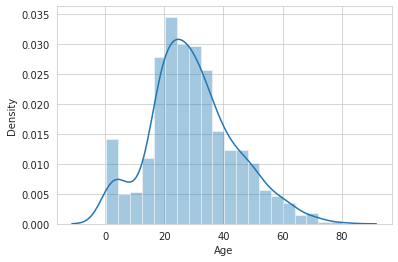

In [ ]:
copy = training.copy()
copy.dropna(inplace = True)
sns.distplot(copy["Age"])

La grafica nos muestra que los datos del campo Age están sesgados hacia la derecha, por lo tanto es mas adecuado completar los datos que faltan con la mediana en lugar de la media, ya que los altos valores a la derecha impactarían demasiado en el valor medio. También se completan los campos Embarked y Fare con 'S' y la mediana respectivamente.

In [ ]:
training["Age"].fillna(training["Age"].median(), inplace = True)
testing["Age"].fillna(testing["Age"].median(), inplace = True) 
training["Embarked"].fillna("S", inplace = True)
testing["Fare"].fillna(testing["Fare"].median(), inplace = True)


Volvemos a listar los valores nulos para verificar

In [ ]:
null_table(training, testing)

Training Data Frame
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
 
Testing Data Frame
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


Ahora que eliminamos los valores faltantes, volvemos a listar los datos imputados

In [ ]:
training.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [ ]:
testing.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


<a name='visual'></a>




### 4. Visualización de los datos

A continuación se analizan diferentes atributos para ver su incidencia en la prediccion final

##### <ins>Sexo</ins>

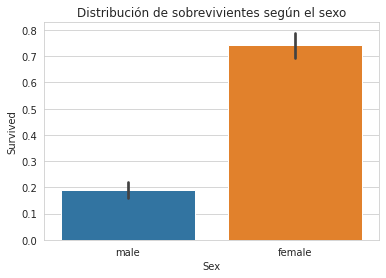

Total de personas que sobrevivieron: 342
Proporción de mujeres que sobrevivieron:
0.6812865497076024
Proporción de hombres que sobrevivieron:
0.31871345029239767


In [ ]:
sns.barplot(x="Sex", y="Survived", data=training)
plt.title("Distribución de sobrevivientes según el sexo")
plt.show()

total_survived_females = training[training.Sex == "female"]["Survived"].sum()
total_survived_males = training[training.Sex == "male"]["Survived"].sum()

print("Total de personas que sobrevivieron: " + str((total_survived_females + total_survived_males)))
print("Proporción de mujeres que sobrevivieron:") 
print(total_survived_females/(total_survived_females + total_survived_males))
print("Proporción de hombres que sobrevivieron:")
print(total_survived_males/(total_survived_females + total_survived_males))

##### <ins>Clase</ins>

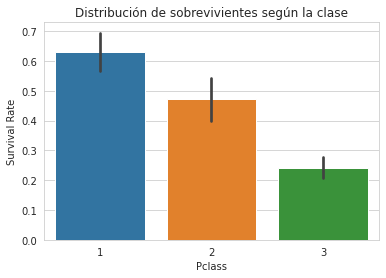

Total de personas que sobrevivieron: 342
Proporción de pasajeros en Clase 1 que sobrevivieron:
0.39766081871345027
Proporción de pasajeros en Clase 2 que sobrevivieron:
0.2543859649122807
Proporción de pasajeros en Clase 3 que sobrevivieron:
0.347953216374269


In [ ]:
sns.barplot(x="Pclass", y="Survived", data=training)
plt.ylabel("Survival Rate")
plt.title("Distribución de sobrevivientes según la clase")
plt.show()

total_survived_one = training[training.Pclass == 1]["Survived"].sum()
total_survived_two = training[training.Pclass == 2]["Survived"].sum()
total_survived_three = training[training.Pclass == 3]["Survived"].sum()
total_survived_class = total_survived_one + total_survived_two + total_survived_three

print("Total de personas que sobrevivieron: " + str(total_survived_class))
print("Proporción de pasajeros en Clase 1 que sobrevivieron:") 
print(total_survived_one/total_survived_class)
print("Proporción de pasajeros en Clase 2 que sobrevivieron:")
print(total_survived_two/total_survived_class)
print("Proporción de pasajeros en Clase 3 que sobrevivieron:")
print(total_survived_three/total_survived_class)

Text(0.5, 1.0, 'Tasa de supervivencia basadas en el sexo y la clase')

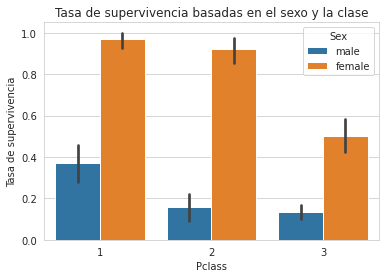

In [ ]:
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=training)
plt.ylabel("Tasa de supervivencia")
plt.title("Tasa de supervivencia basadas en el sexo y la clase")

Text(0.5, 1.0, 'Survival Rates Based on Gender and Class')

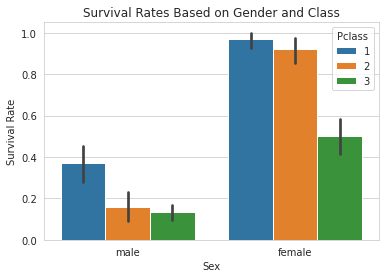

In [ ]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=training)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class")

Aparentemente la clase juega un papel importante en la tasa de sobrevivencia. Los pasajeros de Clase 1 tienen mas chances de sobrevivir que los de las otras clases

##### <ins>Edad</ins>

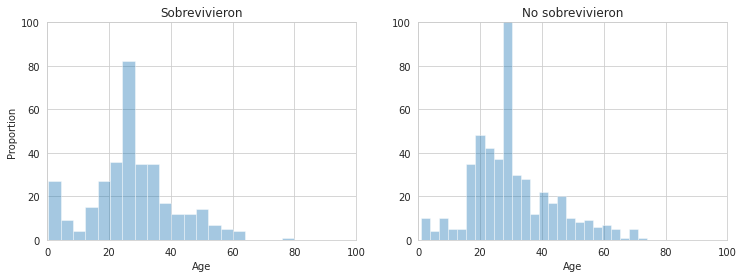

In [ ]:
survived_ages = training[training.Survived == 1]["Age"]
not_survived_ages = training[training.Survived == 0]["Age"]
plt.subplot(1, 2, 1)
sns.distplot(survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Sobrevivieron")
plt.ylabel("Proportion")
plt.subplot(1, 2, 2)
sns.distplot(not_survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("No sobrevivieron")
plt.subplots_adjust(right=1.7)
plt.show()

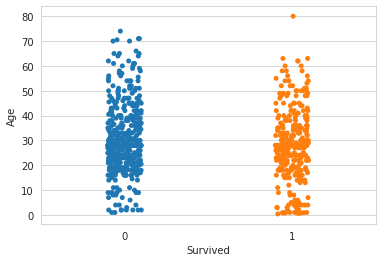

In [ ]:
sns.stripplot(x="Survived", y="Age", data=training, jitter=True)

Parecería que los pasajeros más jóvenes tienen mýs chances de sobrevivir que los mayores, como muestran la gráfica de clustering y el histograma de sobrevivientes.

Finalmente se muestra un resumen de las diferentes gráficas con las relaciones entre todos los atributos de a pares


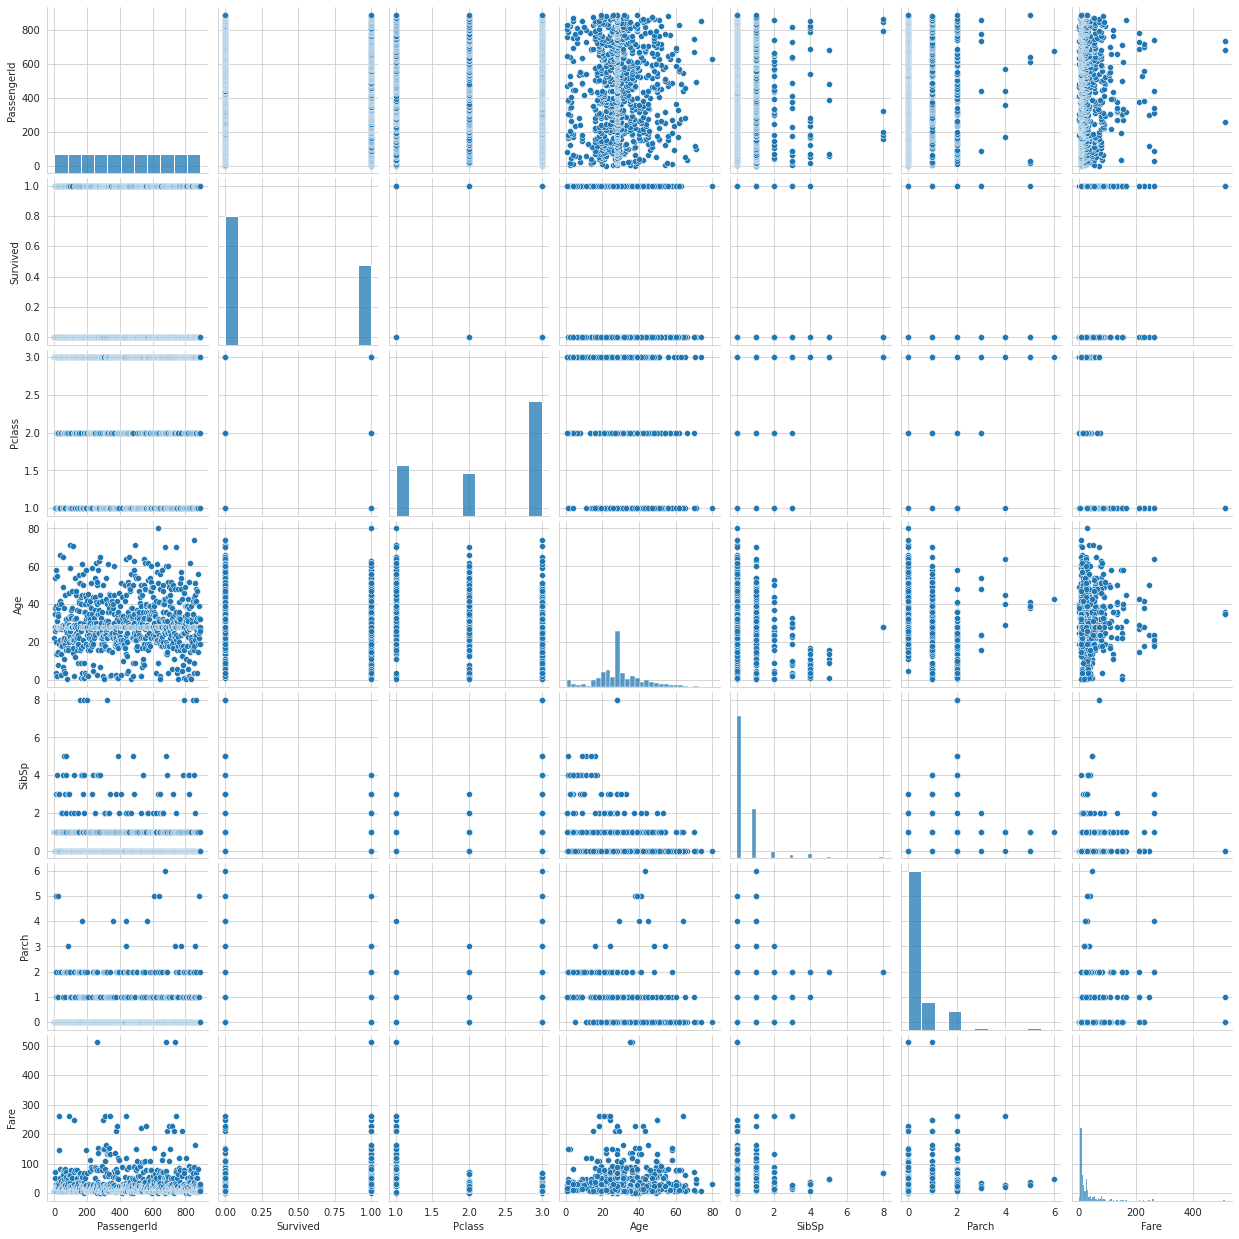

In [ ]:
sns.pairplot(training)

<a name="feature"></a>


### 5. Feature Engineering

Dado que los campos Sex y Embarked son nominales, debemos convertirlos a numericos para aplicarles el modelo.

In [ ]:
training.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.25,S
237,238,1,2,"Collyer, Miss. Marjorie ""Lottie""",female,8.0,0,2,26.25,S
466,467,0,2,"Campbell, Mr. William",male,28.0,0,0,0.00,S
497,498,0,3,"Shellard, Mr. Frederick William",male,28.0,0,0,15.10,S
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.0,1,0,17.80,S


In [ ]:
testing.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
203,1095,2,"Quick, Miss. Winifred Vera",female,8.0,1,1,26.0000,S
104,996,3,"Thomas, Mrs. Alexander (Thamine Thelma"")""",female,16.0,1,1,8.5167,C
299,1191,3,"Johansson, Mr. Nils",male,29.0,0,0,7.8542,S
83,975,3,"Demetri, Mr. Marinko",male,27.0,0,0,7.8958,S
286,1178,3,"Franklin, Mr. Charles (Charles Fardon)",male,27.0,0,0,7.2500,S


Cambiamos los campos a binarios, con 1 y 0 como los valores de la categoria, tanto en los datos de training como los de test.



In [ ]:
set(training["Embarked"])

{'C', 'Q', 'S'}

In [ ]:
from sklearn.preprocessing import LabelEncoder

le_sex = LabelEncoder()
le_sex.fit(training["Sex"])

encoded_sex_training = le_sex.transform(training["Sex"])
training["Sex"] = encoded_sex_training
encoded_sex_testing = le_sex.transform(testing["Sex"])
testing["Sex"] = encoded_sex_testing

le_embarked = LabelEncoder()
le_embarked.fit(training["Embarked"])

encoded_embarked_training = le_embarked.transform(training["Embarked"])
training["Embarked"] = encoded_embarked_training
encoded_embarked_testing = le_embarked.transform(testing["Embarked"])
testing["Embarked"] = encoded_embarked_testing

In [ ]:
training.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
23,24,1,1,"Sloper, Mr. William Thompson",1,28.0,0,0,35.5000,2
761,762,0,3,"Nirva, Mr. Iisakki Antino Aijo",1,41.0,0,0,7.1250,2
360,361,0,3,"Skoog, Mr. Wilhelm",1,40.0,1,4,27.9000,2
221,222,0,2,"Bracken, Mr. James H",1,27.0,0,0,13.0000,2
172,173,1,3,"Johnson, Miss. Eleanor Ileen",0,1.0,1,1,11.1333,2


In [ ]:
testing.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
134,1026,3,"Dintcheff, Mr. Valtcho",1,43.0,0,0,7.8958,2
92,984,1,"Davidson, Mrs. Thornton (Orian Hays)",0,27.0,1,2,52.0000,2
407,1299,1,"Widener, Mr. George Dunton",1,50.0,1,1,211.5000,0
184,1076,1,"Douglas, Mrs. Frederick Charles (Mary Helene B...",0,27.0,1,1,247.5208,0
189,1081,2,"Veal, Mr. James",1,40.0,0,0,13.0000,2


#### Creación y transformación de atributos

In [ ]:
training["FamSize"] = training["SibSp"] + training["Parch"] + 1
testing["FamSize"] = testing["SibSp"] + testing["Parch"] + 1

In [ ]:
training["IsAlone"] = training.FamSize.apply(lambda x: 1 if x == 1 else 0)
testing["IsAlone"] = testing.FamSize.apply(lambda x: 1 if x == 1 else 0)

In [ ]:
for name in training["Name"]:
    training["Title"] = training["Name"].str.extract("([A-Za-z]+)\.",expand=True)
    
for name in testing["Name"]:
    testing["Title"] = testing["Name"].str.extract("([A-Za-z]+)\.",expand=True)

In [ ]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2,2,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0,2,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2,2,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2,1,1,Mr


In [ ]:
titles = set(training["Title"]) #making it a set gets rid of all duplicates
print(titles)

{'Don', 'Dr', 'Ms', 'Lady', 'Sir', 'Mlle', 'Capt', 'Major', 'Miss', 'Master', 'Jonkheer', 'Mr', 'Col', 'Mrs', 'Mme', 'Rev', 'Countess'}


In [ ]:
title_list = list(training["Title"])
frequency_titles = []

for i in titles:
    frequency_titles.append(title_list.count(i))
    
print(frequency_titles)

[1, 7, 1, 1, 1, 2, 1, 2, 182, 40, 1, 517, 2, 125, 1, 6, 1]


In [ ]:
titles = list(titles)

title_dataframe = pd.DataFrame({
    "Titles" : titles,
    "Frequency" : frequency_titles
})

print(title_dataframe)

      Titles  Frequency
0        Don          1
1         Dr          7
2         Ms          1
3       Lady          1
4        Sir          1
5       Mlle          2
6       Capt          1
7      Major          2
8       Miss        182
9     Master         40
10  Jonkheer          1
11        Mr        517
12       Col          2
13       Mrs        125
14       Mme          1
15       Rev          6
16  Countess          1


In [ ]:
title_replacements = {"Mlle": "Other", "Major": "Other", "Col": "Other", "Sir": "Other", "Don": "Other", "Mme": "Other",
          "Jonkheer": "Other", "Lady": "Other", "Capt": "Other", "Countess": "Other", "Ms": "Other", "Dona": "Other"}

training.replace({"Title": title_replacements}, inplace=True)
testing.replace({"Title": title_replacements}, inplace=True)

le_title = LabelEncoder()
le_title.fit(training["Title"])

encoded_title_training = le_title.transform(training["Title"])
training["Title"] = encoded_title_training
encoded_title_testing = le_title.transform(testing["Title"])
testing["Title"] = encoded_title_testing

In [ ]:
training.drop("Name", axis = 1, inplace = True)
testing.drop("Name", axis = 1, inplace = True)

In [ ]:
training.sample(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
535,536,1,2,0,7.0,0,2,26.250,2,3,0,2
19,20,1,3,0,28.0,0,0,7.225,0,1,1,4
839,840,1,1,1,28.0,0,0,29.700,0,1,1,3
98,99,1,2,0,34.0,0,1,23.000,2,2,0,4
804,805,1,3,1,27.0,0,0,6.975,2,1,1,3


In [ ]:
testing.sample(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
191,1083,1,1,27.0,0,0,26.0000,2,1,1,3
180,1072,2,1,30.0,0,0,13.0000,2,1,1,3
134,1026,3,1,43.0,0,0,7.8958,2,1,1,3
66,958,3,0,18.0,0,0,7.8792,1,1,1,2
309,1201,3,0,45.0,1,0,14.1083,2,2,0,4


<a name='norma'></a>

### 5. Normalización

Los valores de Age y Fare son muy diferentes al resto y hace que parezcan más importantes. Se les modifica la escala para que sean más representativos.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#We need to reshape our data since the Scaler takes in arrays
ages_train = np.array(training["Age"]).reshape(-1, 1)
fares_train = np.array(training["Fare"]).reshape(-1, 1)
ages_test = np.array(testing["Age"]).reshape(-1, 1)
fares_test = np.array(testing["Fare"]).reshape(-1, 1)

training["Age"] = scaler.fit_transform(ages_train)
training["Fare"] = scaler.fit_transform(fares_train)
testing["Age"] = scaler.fit_transform(ages_test)
testing["Fare"] = scaler.fit_transform(fares_test)

In [ ]:
training.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
0,1,0,3,1,-0.565736,1,0,-0.502445,2,2,0,3
1,2,1,1,0,0.663861,1,0,0.786845,0,2,0,4
2,3,1,3,0,-0.258337,0,0,-0.488854,2,1,1,2
3,4,1,1,0,0.433312,1,0,0.420730,2,2,0,4
4,5,0,3,1,0.433312,0,0,-0.486337,2,1,1,3


In [ ]:
testing.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
0,892,3,1,0.386231,0,0,-0.497413,1,1,1,3
1,893,3,0,1.371370,1,0,-0.512278,2,2,0,4
2,894,2,1,2.553537,0,0,-0.464100,1,1,1,3
3,895,3,1,-0.204852,0,0,-0.482475,2,1,1,3
4,896,3,0,-0.598908,1,1,-0.417492,2,3,0,4


<a name='modelo'></a>

### 6. Modelado y Predicción con sklearn

In [ ]:
# Se utilizarán los siguientes modelos:

from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import make_scorer, accuracy_score 

from sklearn.model_selection import GridSearchCV

**Definiendo el label en train/test**




In [ ]:
X_train = training.drop(labels=["PassengerId", "Survived"], axis=1) #define training features set
y_train = training["Survived"] #define training label set
X_test = testing.drop("PassengerId", axis=1) #define testing features set


In [ ]:
X_training.head()

NameError: ignored

In [ ]:
X_training[X_training.eq("Col").any(1)]

**Validando el dataset**



Para evitar el sobreajuste, es útil contar con un tercer dataset para validación, utilizando la función train_test_split de sklearn.


In [ ]:
from sklearn.model_selection import train_test_split #to create validation data set

X_training, X_valid, y_training, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0) #X_valid and y_valid are the validation sets

**SVC**



In [ ]:
svc_clf = SVC() 

parameters_svc = {"kernel": ["rbf", "linear"], "probability": [True, False], "verbose": [True, False]}

grid_svc = GridSearchCV(svc_clf, parameters_svc, scoring=make_scorer(accuracy_score))
grid_svc.fit(X_training, y_training)

svc_clf = grid_svc.best_estimator_

svc_clf.fit(X_training, y_training)
pred_svc = svc_clf.predict(X_valid)
acc_svc = accuracy_score(y_valid, pred_svc)

**LinearSVC**

In [ ]:
linsvc_clf = LinearSVC()

parameters_linsvc = {"multi_class": ["ovr", "crammer_singer"], "fit_intercept": [True, False], "max_iter": [100, 500, 1000, 1500]}

grid_linsvc = GridSearchCV(linsvc_clf, parameters_linsvc, scoring=make_scorer(accuracy_score))
grid_linsvc.fit(X_training, y_training)

linsvc_clf = grid_linsvc.best_estimator_

linsvc_clf.fit(X_training, y_training)
pred_linsvc = linsvc_clf.predict(X_valid)
acc_linsvc = accuracy_score(y_valid, pred_linsvc)

print("The Score for LinearSVC is: " + str(acc_linsvc))

**RandomForest Model**

In [ ]:
rf_clf = RandomForestClassifier()

parameters_rf = {"n_estimators": [4, 5, 6, 7, 8, 9, 10, 15], "criterion": ["gini", "entropy"], "max_features": ["auto", "sqrt", "log2"], 
                 "max_depth": [2, 3, 5, 10], "min_samples_split": [2, 3, 5, 10]}

grid_rf = GridSearchCV(rf_clf, parameters_rf, scoring=make_scorer(accuracy_score))
grid_rf.fit(X_training, y_training)

rf_clf = grid_rf.best_estimator_

rf_clf.fit(X_training, y_training)
pred_rf = rf_clf.predict(X_valid)
acc_rf = accuracy_score(y_valid, pred_rf)

print("The Score for Random Forest is: " + str(acc_rf))

**LogisiticRegression Model**

In [ ]:
logreg_clf = LogisticRegression()

parameters_logreg = {"penalty": ["l2"], "fit_intercept": [True, False], "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
                     "max_iter": [50, 100, 200], "warm_start": [True, False]}

grid_logreg = GridSearchCV(logreg_clf, parameters_logreg, scoring=make_scorer(accuracy_score))
grid_logreg.fit(X_training, y_training)

logreg_clf = grid_logreg.best_estimator_

logreg_clf.fit(X_training, y_training)
pred_logreg = logreg_clf.predict(X_valid)
acc_logreg = accuracy_score(y_valid, pred_logreg)

print("The Score for Logistic Regression is: " + str(acc_logreg))

**KNeighbors Model**

In [ ]:
knn_clf = KNeighborsClassifier()

parameters_knn = {"n_neighbors": [3, 5, 10, 15], "weights": ["uniform", "distance"], "algorithm": ["auto", "ball_tree", "kd_tree"],
                  "leaf_size": [20, 30, 50]}

grid_knn = GridSearchCV(knn_clf, parameters_knn, scoring=make_scorer(accuracy_score))
grid_knn.fit(X_training, y_training)

knn_clf = grid_knn.best_estimator_

knn_clf.fit(X_training, y_training)
pred_knn = knn_clf.predict(X_valid)
acc_knn = accuracy_score(y_valid, pred_knn)

print("The Score for KNeighbors is: " + str(acc_knn))

**GaussianNB Model**

In [ ]:
gnb_clf = GaussianNB()

parameters_gnb = {}

grid_gnb = GridSearchCV(gnb_clf, parameters_gnb, scoring=make_scorer(accuracy_score))
grid_gnb.fit(X_training, y_training)

gnb_clf = grid_gnb.best_estimator_

gnb_clf.fit(X_training, y_training)
pred_gnb = gnb_clf.predict(X_valid)
acc_gnb = accuracy_score(y_valid, pred_gnb)

print("The Score for Gaussian NB is: " + str(acc_gnb))

**DecisionTree Model**

In [ ]:
dt_clf = DecisionTreeClassifier()

parameters_dt = {"criterion": ["gini", "entropy"], "splitter": ["best", "random"], "max_features": ["auto", "sqrt", "log2"]}

grid_dt = GridSearchCV(dt_clf, parameters_dt, scoring=make_scorer(accuracy_score))
grid_dt.fit(X_training, y_training)

dt_clf = grid_dt.best_estimator_

dt_clf.fit(X_training, y_training)
pred_dt = dt_clf.predict(X_valid)
acc_dt = accuracy_score(y_valid, pred_dt)

print("The Score for Decision Tree is: " + str(acc_dt))

**XGBoost Model**

In [ ]:
from xgboost import XGBClassifier

xg_clf = XGBClassifier()

parameters_xg = {"objective" : ["reg:linear"], "n_estimators" : [5, 10, 15, 20]}

grid_xg = GridSearchCV(xg_clf, parameters_xg, scoring=make_scorer(accuracy_score))
grid_xg.fit(X_training, y_training)

xg_clf = grid_xg.best_estimator_

xg_clf.fit(X_training, y_training)
pred_xg = xg_clf.predict(X_valid)
acc_xg = accuracy_score(y_valid, pred_xg)

print("The Score for XGBoost is: " + str(acc_xg))

<a name='eval'></a>

### 7. Evaluación del Rendimiento del Modelo

In [ ]:
model_performance = pd.DataFrame({
    "Model": ["SVC", "Linear SVC", "Random Forest", 
              "Logistic Regression", "K Nearest Neighbors", "Gaussian Naive Bayes",  
              "Decision Tree", "XGBClassifier"],
    "Accuracy": [acc_svc, acc_linsvc, acc_rf, 
              acc_logreg, acc_knn, acc_gnb, acc_dt, acc_xg]
})

model_performance.sort_values(by="Accuracy", ascending=False)